# Explority Data Analysis

###### visualizations.py functions:
- plot_timeline()

###### helpers.py functions:
- load_bitcoin_edge_data()
- user_activity_dataframe()
- build_graph()

In [7]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import sys
sys.path.insert(0, '../src')
import helpers as h
import visualizations as v
import model as m

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

### Load and preprocess data for EDA

In [8]:
otc_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinotc.csv.gz')
alpha_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinalpha.csv.gz')

### Load graph objects

In [9]:
otc_G = h.build_graph('otc',otc_df)
otc_pos_G = h.build_graph('otc',otc_df, rating_type='pos')

### Plot marketplace timeline overview

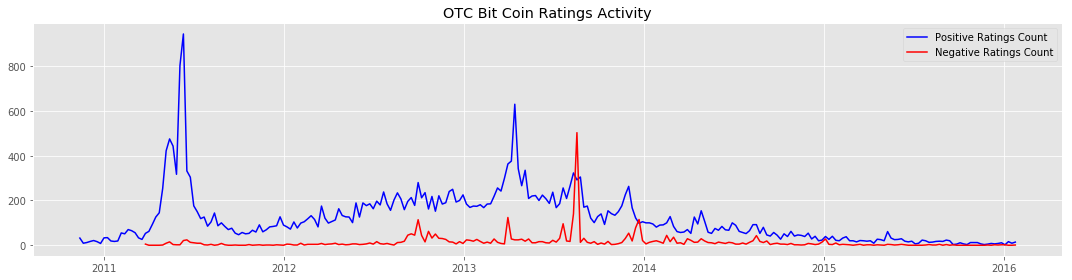

In [10]:
v.plot_timeline(otc_df, 'OTC Bit Coin Ratings Activity')

### Marketplace Usage Statistics

In [23]:
print("\nOTC Bitcoin")
print(f"Number of Users (nodes): {otc_G.number_of_nodes()}")
print(f"Number of Ratings (edges): {otc_G.number_of_edges()}")
print(f"Percent Negative Ratings: {100*otc_df['class'].mean():0.1f}%")
print(f"Average Rating: {otc_df['rating'].mean():0.1f}")

Alpha Bitcoin
Number of Users (nodes): 3783
Number of Ratings (edges): 24186
Percent Negative Ratings: 6.4%
Average Rating: 1.5

OTC Bitcoin
Number of Users (nodes): 5881
Number of Ratings (edges): 35588
Percent Negative Ratings: 10.0%
Average Rating: 1.0


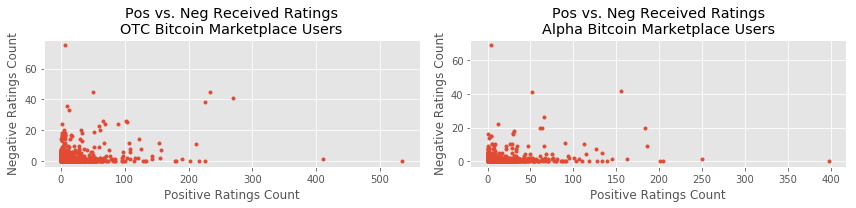

In [18]:
# fraud received vs. pos received
def received_ratings_graph(ax, x, y, title):
    ax.plot(x, y, '.')
    ax.set_title("Pos vs. Neg Received Ratings\n"+title+" Bitcoin Marketplace Users")
    ax.set_xlabel("Positive Ratings Count")
    ax.set_ylabel("Negative Ratings Count")
    
fig, ax = plt.subplots(1,2, figsize=(12,3))
received_ratings_graph(ax[0], otc_users['PosReceivedCnt'], otc_users['NegReceivedCnt'], "OTC")
plt.tight_layout()